# Tutorial Manejo de Datos y Pandas

## Estructuras de Datos e Índices


Pandas soporta la lectura de una amplia cantidad de formatos ([más info](http://pandas.pydata.org/pandas-docs/stable/io.html)): 

- read_csv
- read_excel
- read_hdf
- read_sql
- read_json
- read_msgpack (experimental)
- read_html
- read_gbq (experimental)
- read_stata
- read_sas
- read_clipboard
- read_pickle

Vamos a empezar a probar con una dataset publicado para una competencia de kaggle: [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data).

In [ ]:
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import matplotlib.pyplot as plt

In [ ]:
#setup para el notebook

%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

In [ ]:
data = pd.read_csv("./Bases/titanic.csv", index_col="PassengerId")
data

In [ ]:
data.index

In [ ]:
data.columns

Las estructuras de datos en pandas, por lo general, no son modificadas en vivo con comandos como `set_index`, para hacer eso es necesario cambiar el argumento `inplace` o reasignar la variables

## Tipos de Indexado

Hay varias formas de seleccionar un subconjunto de los datos:

- Como las listas o arrays, por posición.
- Como los diccionarios, por llave o etiqueta.
- Como los arrays, por máscaras de verdadero o falso.
- Se puede indexar por número, rango o lista (array)
- Todos estos métodos pueden funcionar subconjunto como en las columnas


## Reglas Básicas

1. Se usan corchetes (abreviatura para el método `__getitem__`) para seleccionar columnas de un `DataFrame`

    ```python
    >>> df[['a', 'b', 'c']]
    ```

2. Se usa `.iloc` para indexar por posición (tanto filas como columnas)

    ```python
    >>> df.iloc[[1, 3], [0, 2]]
    ```
    
3. Se usa `.loc` para indexar por etiquetas (tanto filas como columnas)

    ```python
    >>> df.loc[["elemento1", "elemento2", "elemento3"], ["columna1", "columna2"]]
    ```

4. `ix` permite mezclar etiquetas y posiciones (tanto filas como columnas)

    ```python
    >>> df.ix[["elemento1", "elemento2", "elemento3"], [0, 2]]
    ```
    ```python
    >>> df.ix[[1, 3], ["columna1", "columna2"]]
    ```


In [ ]:
data.loc[[1, 2, 3], ["Name", "Sex"]]

In [ ]:
data.iloc[[1, 2, 3], [2, 3]]

In [ ]:
data.ix[[1, 2, 3], ["Name", "Sex"]]

In [ ]:
temp = data.copy()
temp.index = ["elemento_" + str(i) for i in temp.index]
temp

In [ ]:
temp.loc[["elemento_1", "elemento_2", "elemento_3"], ["Name", "Sex"]]

In [ ]:
temp.iloc[[1, 2, 3], [2, 3]]

In [ ]:
temp.ix[[1, 2, 3], ["Name", "Sex"]]

In [ ]:
del temp

In [ ]:
data.loc[:3, :"Sex"]

In [ ]:
#indexar por `slices`

data.iloc[:3]

In [ ]:
data.iloc[-3:]

In [ ]:
data.loc[1:10, ["Name", "Sex", "Ticket"]]

In [ ]:
data[["Name", "Ticket"]]

In [ ]:
use_cols = ["Name", "Ticket"]
data[use_cols]

In [ ]:
data["Name"]

In [ ]:
cols =["Name"]
data[cols]

In [ ]:
data.Name

In [ ]:
temp = data[["Name"]].copy()
temp.OtroNombre = ["OTRO_" + n for n in data.Name]
temp

In [ ]:
temp.OtroNombre[:10]

In [ ]:
temp["OtroNombre"] = ["OTRO_" + n for n in data.Name]
temp

In [ ]:
del temp

In [ ]:
data.iloc[1]

In [ ]:
data.iloc[[1]]

In [ ]:
data.SibSp

In [ ]:
data["NumFam"] = data.SibSp + data.Parch
data

In [ ]:
data.SibSp > 0

In [ ]:
#otra forma de filtrar es con mascaras binarias (`boolean`)
data[data.SibSp > 0][["Sex", "Age"]]

In [ ]:
data[["Age", "Sex"]]

In [ ]:
data[(data.SibSp > 0) & (data.Age < 18)]

### Ejercicio

###### seleccionar varones mayores de 65 años que viajan solos

In [ ]:
# escribir la solucion aqui...

data[(data.Sex == 'male') & (data.Age > 65.0) & (data.SibSp == 0)][["Name","Sex","Age","SibSp"]]

In [ ]:
# %load soluciones/mayores_solos.py


### Filtrado de filas y columnas

Para eliminar lo que no quieren en lugar de seleccionar lo que sì

```
DataFrame.drop(etiquetas, axis=0, ...)

Parámetros
----------
etiquetas : etiqueta o lista de etiquetas
axis : entero o nombre de la dimesión
    - 0 / 'index', para eliminar filas
    - 1 / 'columns', para elimnar columnas
```

In [ ]:
data.shape

In [ ]:
valid_index = np.random.choice(data.index, int(data.index.shape[0] * 0.1), replace=False)
valid_index

In [ ]:
train = data.drop(valid_index)
valid = data.loc.__getitem__(valid_index)
train

In [ ]:
valid

In [ ]:
X_train, y_train = train.drop("Survived", axis=1), train["Survived"]
X_valid, y_valid = valid.drop("Survived", axis=1), valid["Survived"]
X_train

In [ ]:
y_train

### Agrupaciones y Tablas de Contingencia

#### Agrupaciones

Las agrupaciones sirven para hacer cálculos sobre subconjuntos de los datos, generalmente tienen tres partes:

1. Definir los grupos
2. Aplicar un cálculo
3. Combinar los resultados

In [ ]:
#agrupar
agrupado = data.groupby("Pclass")
agrupado

In [ ]:
#sólo hemos agrupado, no se ha hecho ningún cálculo, para eso hay que aplicar alguna función
agrupado.Survived.mean()

In [ ]:
agrupado.Survived.agg({"media": "mean", "media_2": np.mean, "varianza": "var", "cantidad": "count"})

In [84]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'NumFam'],
      dtype='object')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
NumFam      891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 130.5+ KB


#### Tablas de Contingencia

Las tablas de contingencia asemejan las tablas dinámicas de excel, sirven para ver interacciones entre variables

In [ ]:
data.groupby("Survived")[['Age', 'SibSp', 'Parch', 'NumFam', 'Fare']].mean()

In [ ]:
pd.crosstab(data.Pclass, data.Survived)

In [ ]:
pd.crosstab(data.Pclass, data.Survived).apply(lambda x: x/x.sum(), axis=1)

In [ ]:
data.Survived.value_counts()

In [ ]:
data.Survived.value_counts?

In [80]:
data.Survived.value_counts(True).sort_index()

0   0.62
1   0.38
Name: Survived, dtype: float64

In [81]:
pd.crosstab(data.Pclass, pd.cut(data.Age, [i * 10 for i in range(9)]), 
            values=data.Survived, aggfunc=np.mean)

TypeError: cannot determine next label for type <class 'str'>

In [ ]:
pd.crosstab(data.Pclass, pd.cut(data.Age, [i * 10 for i in range(9)]))

### Poniendo todo junto en un ejemplo de Data Mining

In [ ]:
#hay variables que no son numericas y que hay que codificar antes que nada
tipos = data.dtypes
tipos.value_counts()

In [ ]:
tipos_objeto = tipos[tipos == "object"]
tipos_objeto

In [ ]:
nulos = data.isnull().sum()
nulos

In [ ]:
nulos[nulos > 0]

In [ ]:
data["Sex"].value_counts()

In [ ]:
data["Sex"] = data.Sex.apply(lambda x: {"male": 0, "female": 1}[x])
data["Sex"].value_counts()

In [ ]:
data["Ticket"].unique().shape

In [ ]:
data["Ticket"].factorize()

In [ ]:
data["Ticket"] = data["Ticket"].factorize()[0]
data["Ticket"].value_counts()

In [ ]:
data.Embarked.fillna(-1).value_counts()

In [ ]:
data[data.Embarked.isnull()]

In [ ]:
data[(data.Fare >= 70) & (data.Fare <= 90)].Embarked.value_counts()

In [ ]:
data.Embarked.fillna("S", inplace=True)
data.Embarked.fillna(-1).value_counts()

In [ ]:
pd.crosstab(data.Embarked, data.Survived)

In [ ]:
pd.crosstab(data.Embarked, data.Survived).apply(lambda x: x/x.sum(), axis=1)

In [ ]:
pd.get_dummies(data.Embarked)

In [ ]:
data = data.join(pd.get_dummies(data.Embarked)).drop("Embarked", axis=1)

In [ ]:
data

In [ ]:
data.Cabin.fillna(-1).value_counts()

In [ ]:
data["Cabin"] = data.Cabin.fillna(-1).factorize()[0]

In [ ]:
data

In [ ]:
data.Age.fillna(-1).value_counts()

In [ ]:
pd.crosstab(data.Age.isnull(), data.Survived).apply(lambda x: x/x.sum(), axis=1)

In [ ]:
data["Age_nul"] = data.Age.isnull().astype(int)
data

In [ ]:
data.Age.fillna(data.Age.mean(), inplace=True)
data

In [ ]:
data.isnull().sum().sum()

In [ ]:
data.drop("Name", axis=1, inplace=True)
data

In [ ]:
data.dtypes.value_counts()

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
NumFam      891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 130.5+ KB


In [ ]:
valid_index

In [ ]:
data.corr()

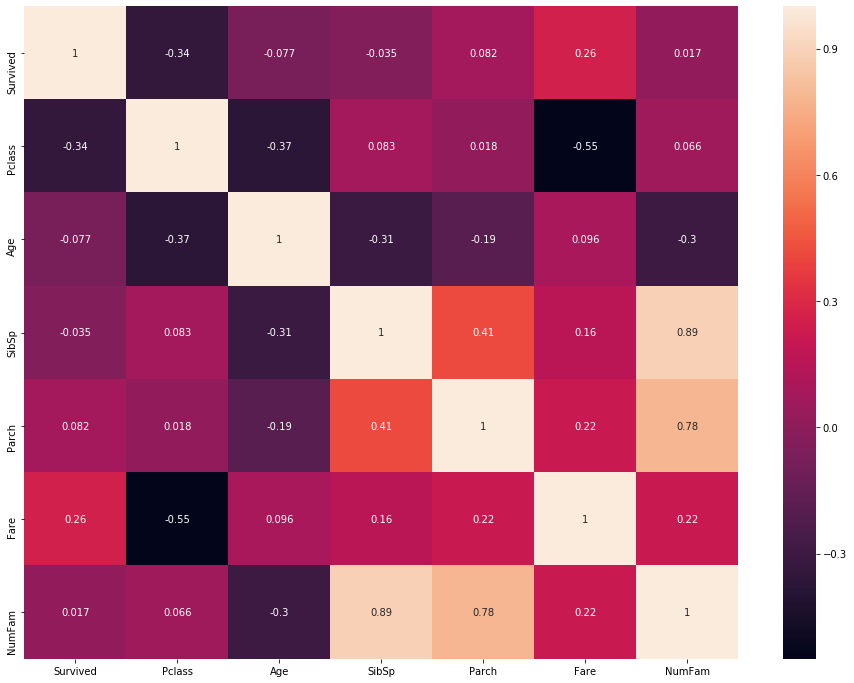

In [83]:
sns.heatmap(data.corr(), annot=True)